In [1]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Looks like it has different indicators for different countries with the year and value of the indicator. 

### How many UNIQUE country names are there ?

In [4]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

To find put how many 'unique' contries are in the column

### Are there same number of country codes ?

In [5]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

If we have 247 countries, we should have 246 country codes. And, we do.

### How many indicator we have?

In [6]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

This is a pretty extensive list of indicators. 

### How many indicator codes of data do we have ?

In [7]:
# How many unique indicator codes are there ? (should be the same #)
indicatorCode = data['IndicatorCode'].unique().tolist()
len(indicatorCode)

1344

### How many years of data do we have ?

In [8]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years

In [9]:
print(min(years), 'to ', max(years))

1960 to  2015


In short, we have a pretty good feel for the dataset. We've various indicators per country over the time span of 1960 to 2015.

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1</p><br>

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [10]:
# Select CO2 emissions for the USA
hist_indicator = 'CO2 emissions \(metric' # \( 功能: 只找字串符合 'CO2 emissions (metric...' 
hist_country = 'USA'

mask1 = data['IndicatorName']. str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

In [11]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Let's see how emissions have changed over time using MatplotLib

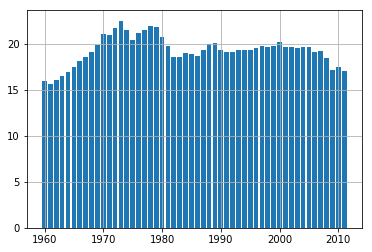

In [12]:
# get the years
years = stage['Year'].values

# get the values
co2 = stage['Value'].values

#create
plt.bar(years, co2)
plt.grid(True)
plt.show()

Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

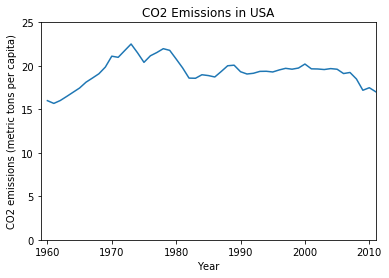

In [13]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start the y axis at 0, 如果不加上的話, y只從最低的15開始
plt.axis([1959, 2011, 0 , 25]) #前兩個值為x區間, 後兩個值為y區間

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year.

In [14]:
# If you want to just include those within one standard deviation for the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values
hist_data

array([15.99977916, 15.68125552, 16.0139375 , 16.48276215, 16.96811858,
       17.45172525, 18.12107301, 18.59831788, 19.08938916, 19.85794566,
       21.11125227, 20.98020348, 21.74864198, 22.51058213, 21.50293038,
       20.40222407, 21.15761537, 21.53248401, 21.97300469, 21.78043698,
       20.78648774, 19.76676417, 18.59049523, 18.57154371, 18.97675027,
       18.88231274, 18.72072272, 19.35033442, 20.01041341, 20.07576978,
       19.32336817, 19.06223666, 19.14555576, 19.36346258, 19.37655644,
       19.29565986, 19.52789051, 19.71427574, 19.6151546 , 19.74781478,
       20.20761476, 19.65619321, 19.63919577, 19.57623905, 19.68358135,
       19.61027504, 19.11613882, 19.23746045, 18.48923375, 17.1923791 ,
       17.48479218, 17.02021634])

In [15]:
print(len(hist_data))

52


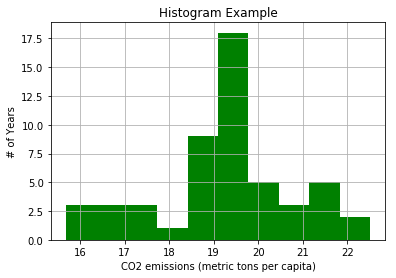

In [16]:
# the histogram of the data
plt.hist(hist_data, color = 'green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True) #畫方格

plt.show()

what we get is a histogram of CO2 emissions per capita for the US. <br>
So the USA has many years where it produced CO2 between 19-20 metric tons per capita with outliers on either side.

### But how do the USA's numbers relate to those of other countries?

In [17]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year]) #.isin() 選擇只有2011年份

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head() #按照國家順序名稱排列

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


我們可以猜想ＵＳ的CO2 emission per capita一定比這幾項來得高

### For how many countries do we have CO2 per capita emissions data in 2011

In [18]:
print(len(co2_2011)) #共232國家, 包含美國

232


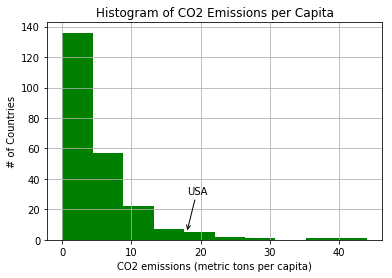

In [19]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.

fig, ax = plt.subplots()

ax.annotate('USA',
           xy = (18, 5), xycoords = 'data',
           xytext = (18, 30), textcoords = 'data',
           arrowprops = dict(arrowstyle = '->',
                            connectionstyle = 'arc3'),
           )

plt.hist(co2_2011['Value'], color = 'green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions per Capita')

#plt.axis([10, 22, 0, 14])

plt.grid(True)

plt.show()

https://matplotlib.org/users/annotations_guide.html
可參考annotating 用法

Most of countries have CO2 emissions in the range of 0 to 10 metric tons per capita. 
<br>The US, at around 17 in 2011, is actually a real outlier.
<br>So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

### An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

In [20]:
# 總共有幾筆數值在2011年
value = co2_2011['Value'].unique().tolist()
len(value)

232

In [21]:
# value 區間
print(min(value), 'to ', max(value))

0.0213499260634489 to  44.0189263670224


In [22]:
#用DataFrame.sort_values排序由大到小，可以查出最多CO2排放量國家在Qatar
#參閱sort_values用法: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
df = pd.DataFrame(co2_2011).sort_values(by = ['Value'], ascending = False)
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5161482,Qatar,QAT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,44.018926
5188137,Trinidad and Tobago,TTO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,37.140054
5122885,Kuwait,KWT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,28.102662
5067585,Brunei Darussalam,BRN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,24.392013
5053556,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,23.922412


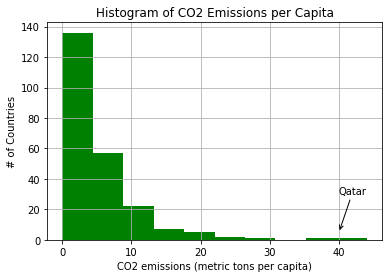

In [23]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.

fig, ax = plt.subplots()

ax.annotate('Qatar',
           xy = (40, 5), xycoords = 'data',
           xytext = (40, 30), textcoords = 'data',
           arrowprops = dict(arrowstyle = '->',
                            connectionstyle = 'arc3'),
           )

plt.hist(co2_2011['Value'], color = 'green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions per Capita')

#plt.axis([10, 22, 0, 14])

plt.grid(True)

plt.show()

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 2</p>

### Relationship between GDP and CO2 Emissions in USA

In [24]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005' #僅看 constant 2005 US$
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [25]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [26]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


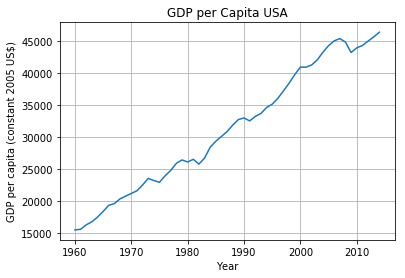

In [27]:
#觀察 GDP per Capita vs Year的變化
# switch to the line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('GDP per Capita USA')


plt.grid(True)

plt.show()

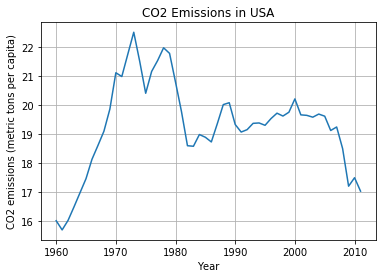

In [28]:
# 再次作圖觀察 CO2 emissions per Capita vs Year的變化
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start the y axis at 0, 如果不加上的話, y只從最低的15開始
#plt.axis([1959, 2011, 0 , 25]) #前兩個值為x區間, 後兩個值為y區間

plt.grid(True)
plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita.<br>
即便減少了CO2排放量, GDP沒有跟著減少

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [29]:
print('GDP min Year :', gdp_stage['Year'].min() ,'Max :', gdp_stage["Year"].max())
print('CO2 min Year :', stage['Year'].min(), 'Max :', stage['Year'].max())

GDP min Year : 1960 Max : 2014
CO2 min Year : 1960 Max : 2011


觀察到GDP跟CO2排放量最少跟最低的年份在1960, 但最CO2排放量大值的年份跟GDP最高年份不同. 
<br>做這點確認很重要, 如果是一樣, 或許我們不需要做scatter plot, 但如果不同， 有必要做scatter plot

We have 3 extra years of GDP data, so let's **trim those off** so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [30]:
# To do the trimming, let's ask for the years before 2012
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

#Check that the data has the same number for both GDP and the CO2 emissions
print(len(gdp_stage_trunc))
print(len(stage)) 

52
52


結論得到我們都有52 years 的data在所選的區域內

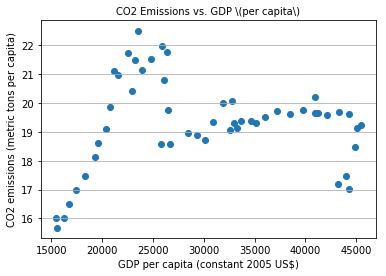

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid Lines, Xticks, XLabel, YLabel

# label x, y, and title
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0], fontsize = 10)
axis.set_ylabel(stage['IndicatorName'].iloc[0], fontsize = 10)
axis.set_title ('CO2 Emissions vs. GDP \(per capita\)', fontsize = 10)

# grid open only for y-axis
axis.yaxis.grid(True)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [32]:
# NP裡頭的 correlation coefficient function查看兩者關係
np.corrcoef(gdp_stage_trunc['Value'], stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

A correlation of 0.07 is pretty weak, but you'll learn more about correlation in the next course.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

# Using Folium Library for Geographic Overlays

### Further exploring CO2 Emissions per capita in the World Development Indicators Dataset

In [33]:
import folium
import pandas as pd

### Country coordinates for plotting

source: https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json

In [34]:
country_geo = 'world-countries.json'

In [35]:
# Read on the World Development Indicators Database
data = pd.read_csv('world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [36]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### Pull out CO2 emisions for every country in 2011

In [37]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
stage = data[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


### Setup our data for plotting.  

Create a data frame with just the **country codes** and the **values** we want plotted.

In [38]:
plot_data = stage[['CountryCode', 'Value']]
plot_data.head()

,CountryCode,Value
5026275,ARB,4.724500
5026788,CSS,9.692960
5027295,CEB,6.911131
5027870,EAS,5.859548
5028456,EAP,5.302499


In [39]:
# Label for the Legend
hist_indicator = stage.iloc[0]['IndicatorName']

## Visualize CO2 emissions per capita using Folium

Folium provides interactive maps with the ability to create sophisticated overlays for data visualization

In [40]:
# Setup a folium map at a high-level zoom 
map = folium.Map(location= [100, 0], zoom_start = 1.5)

In [41]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations

map.choropleth(geo_data= country_geo, data=plot_data,
               columns=['CountryCode', 'Value'],
               key_on='feature.id',
               fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2, 
               legend_name=hist_indicator)

In [42]:
# Create Folium plot
map.save('plot_data.html')

In [43]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

More Folium Examples can be found at:<br>
http://python-visualization.github.io/folium/quickstart.html#Getting-Started<br>

Documentation at:<br>
http://python-visualization.github.io/folium/